1. Берем ЭЭГ
2. Срезаем верхние и нижние частоты
3. Медианный фильтр
4. Амплитуда ритмов ЭЭГ (Альфа-Тета)
5. Подбор параметров под KNN 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifie
from sklearn.model_selection import train_test_split
from numpy import meanr

In [ ]:
data = open('problem3_data.txt').read()

In [ ]:
df = data.split('\n')

In [ ]:
dataset[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512_2
0,7,11,-2,-7,6,19,10,-21,0,0,7,-6,6,-40,-4,21,21,-15,4,-13,-8,-1,-6,-10,2,-3,0,0,-5,1,10,13,-11,-7,-11,5,-16,-3,-37,-7,...,-6,1,2,18,6,0,3,6,11,16,8,9,1,1,9,8,5,0,14,-1,-4,1,0,2,0,4,-4,4,10,12,-3,2,-10,4,-7,6,-4,-13,-5,1
1,20,20,18,3,-3,38,24,32,20,29,8,30,19,-3,-3,0,-4,-1,-13,-7,19,-21,18,-30,-7,25,12,11,27,1,10,0,10,-16,-14,1,-21,-12,-11,-13,...,9,14,-2,1,-4,2,0,-3,-15,-29,0,-12,-29,-31,-15,-17,-25,-11,-37,-29,-4,-7,-10,-19,-1,-69,7,21,8,36,23,18,16,-9,7,-2,-17,-4,-42,0
2,-1,10,23,14,5,21,38,17,6,20,16,3,5,5,13,3,10,9,2,-8,-11,21,14,10,18,-1,4,3,21,5,6,2,0,17,-4,7,19,18,11,20,...,0,-2,3,-2,4,13,0,0,-6,-1,4,-20,-22,-5,17,-15,-12,-5,-1,6,17,15,-20,-6,7,6,-15,-6,-9,-2,0,-4,-7,3,0,0,7,11,0,1
3,-29,-12,0,13,15,-13,26,46,40,31,3,23,73,102,45,-11,-2,-7,19,23,48,13,12,29,-17,-49,-12,0,13,-12,20,41,24,50,20,34,54,65,44,54,...,-46,-11,29,-18,-18,-48,-58,-14,-22,-34,-5,3,-34,-61,-82,-39,-27,-2,11,25,-7,-42,-32,-30,-20,-45,-18,-9,-30,-82,-64,-54,-30,10,15,-21,-17,-23,-34,0
4,47,3,20,56,39,38,11,34,49,58,-3,61,-62,-21,-8,-32,-18,1,-2,2,-15,-6,0,4,10,23,35,25,78,64,-12,10,10,34,55,2,-16,-9,-20,-11,...,-7,-12,-1,7,-6,7,18,35,29,15,12,5,3,-5,-34,-17,6,-1,-70,-56,-44,-15,-61,-7,-20,-7,18,12,22,32,25,19,63,57,12,-17,-7,27,14,0
5,-5,9,-4,-3,8,-3,8,12,17,12,2,8,5,4,4,-10,1,8,5,-8,-10,-3,7,6,1,1,-2,-8,5,10,-12,-6,-4,5,-13,0,-2,1,-5,3,...,-14,-2,14,-3,-6,5,10,12,-15,5,13,6,20,-2,5,0,13,-2,3,-7,10,4,-13,-6,7,19,22,9,5,5,15,3,2,-11,-10,-6,0,7,16,1
6,5,19,0,2,27,25,27,11,13,-1,11,32,34,3,24,13,14,16,14,12,8,14,13,17,24,1,10,22,16,-6,30,30,17,-4,-7,17,16,3,27,13,...,-37,-34,-19,-3,-18,-12,-12,2,13,22,0,4,-30,-14,-7,-5,-16,-21,10,-22,-3,-17,-13,0,3,-33,-14,-29,-11,5,6,-35,-16,-17,-27,-6,-23,-20,-15,1
7,23,19,4,-4,-2,6,11,12,22,12,6,8,27,30,5,-14,-6,0,-6,-19,-6,0,-1,3,6,18,21,24,0,10,20,7,10,3,-6,-13,-12,0,-4,-19,...,17,10,6,26,18,6,15,-1,9,11,-5,-11,0,-7,7,11,-9,7,33,14,31,-3,13,19,9,10,-5,23,43,9,10,-10,-19,-2,-1,4,-5,0,1,1
8,19,-20,-10,-4,10,13,29,22,16,27,34,1,53,51,-2,-15,-25,-3,-7,6,12,-16,10,10,8,26,14,4,28,9,33,17,19,24,7,15,43,-4,-16,21,...,-3,-8,-24,-29,-44,-40,-37,-11,-18,-20,-21,-11,12,3,8,23,14,16,21,28,36,31,11,2,-33,-16,-13,3,-12,-30,22,-42,-32,-27,-47,-41,-30,-39,-14,0
9,0,0,-22,-13,-15,-3,-5,-24,-15,6,4,10,8,14,-3,0,-9,-25,-22,-6,0,-11,-14,-18,-3,0,7,-6,4,6,21,0,6,3,11,-4,6,-20,-12,-9,...,10,5,15,6,19,25,7,8,9,13,6,7,17,3,4,4,17,-5,-2,10,11,6,12,6,10,1,21,8,0,20,-7,-2,-7,7,8,20,8,-9,2,1


In [ ]:
X = []
y = []
for i in range(1,len(df),2):
  X.append([int(i) for i in df[i].split()]+[df[i-1]])
  y.append(df[i-1])

In [ ]:
dataset= pd.get_dummies(dataset,drop_first=1)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512_2
0,7,11,-2,-7,6,19,10,-21,0,0,7,-6,6,-40,-4,21,21,-15,4,-13,-8,-1,-6,-10,2,-3,0,0,-5,1,10,13,-11,-7,-11,5,-16,-3,-37,-7,...,-6,1,2,18,6,0,3,6,11,16,8,9,1,1,9,8,5,0,14,-1,-4,1,0,2,0,4,-4,4,10,12,-3,2,-10,4,-7,6,-4,-13,-5,1
1,20,20,18,3,-3,38,24,32,20,29,8,30,19,-3,-3,0,-4,-1,-13,-7,19,-21,18,-30,-7,25,12,11,27,1,10,0,10,-16,-14,1,-21,-12,-11,-13,...,9,14,-2,1,-4,2,0,-3,-15,-29,0,-12,-29,-31,-15,-17,-25,-11,-37,-29,-4,-7,-10,-19,-1,-69,7,21,8,36,23,18,16,-9,7,-2,-17,-4,-42,0
2,-1,10,23,14,5,21,38,17,6,20,16,3,5,5,13,3,10,9,2,-8,-11,21,14,10,18,-1,4,3,21,5,6,2,0,17,-4,7,19,18,11,20,...,0,-2,3,-2,4,13,0,0,-6,-1,4,-20,-22,-5,17,-15,-12,-5,-1,6,17,15,-20,-6,7,6,-15,-6,-9,-2,0,-4,-7,3,0,0,7,11,0,1
3,-29,-12,0,13,15,-13,26,46,40,31,3,23,73,102,45,-11,-2,-7,19,23,48,13,12,29,-17,-49,-12,0,13,-12,20,41,24,50,20,34,54,65,44,54,...,-46,-11,29,-18,-18,-48,-58,-14,-22,-34,-5,3,-34,-61,-82,-39,-27,-2,11,25,-7,-42,-32,-30,-20,-45,-18,-9,-30,-82,-64,-54,-30,10,15,-21,-17,-23,-34,0
4,47,3,20,56,39,38,11,34,49,58,-3,61,-62,-21,-8,-32,-18,1,-2,2,-15,-6,0,4,10,23,35,25,78,64,-12,10,10,34,55,2,-16,-9,-20,-11,...,-7,-12,-1,7,-6,7,18,35,29,15,12,5,3,-5,-34,-17,6,-1,-70,-56,-44,-15,-61,-7,-20,-7,18,12,22,32,25,19,63,57,12,-17,-7,27,14,0


In [ ]:
X = dataset.drop(['512_2'],axis=1)
y = dataset['512_2']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)


In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
31,-14,0,13,6,9,3,-1,-6,14,6,14,6,-5,8,-3,-23,-24,-19,-10,-27,-29,-28,-27,-16,-21,-1,-30,-22,-21,-8,-3,-25,-8,5,-5,-2,-4,-12,-21,0,...,12,10,16,22,21,27,32,39,34,22,17,26,26,13,11,9,34,21,21,34,11,2,19,21,21,-8,5,0,2,4,-4,11,14,22,28,18,18,18,31,31
76,12,-29,2,10,-4,0,-17,22,5,-12,-23,14,8,-6,-7,-5,-2,0,-10,14,-2,-7,-16,-23,4,-5,7,-6,4,-5,0,10,-13,-1,1,-2,-1,5,-24,10,...,0,12,16,-18,3,-22,3,3,-5,-13,-13,-24,21,-28,-35,-2,15,13,-7,-1,-2,-13,4,18,-5,38,-15,14,-3,1,11,-19,14,4,-13,-2,25,22,24,-19
47,15,8,3,24,12,25,17,9,14,-18,-20,-2,-11,-32,-9,-19,-5,-19,5,5,-13,18,26,-6,10,13,18,15,9,34,9,-4,15,-3,13,-23,-13,-12,-5,-5,...,-4,-4,-15,-27,-6,4,-8,3,-29,-7,-11,0,12,-3,-29,-14,-5,-17,-30,-27,-11,-10,-5,-11,-11,-23,-12,-12,-27,-24,-6,-18,-22,14,-8,-4,-4,-13,12,-11
26,0,-21,-15,-13,10,2,-6,-7,-4,0,-2,-16,-17,-6,10,-9,2,3,-5,-3,-1,0,-5,2,13,10,-6,6,9,22,11,16,-3,10,-4,-1,20,-3,1,2,...,-17,-8,-13,3,-6,-9,-14,-13,1,-5,3,-12,7,-9,0,-7,-8,-8,0,-7,4,-13,-12,-3,-1,6,-1,1,4,11,8,-15,-3,-2,4,7,2,-1,6,-6
44,-12,0,6,-6,-14,-3,-11,-21,-5,-1,-19,-2,5,-13,-18,-39,-24,-15,1,-13,-19,-10,1,-19,-20,0,-24,-20,-17,-6,-5,-26,-20,-22,-19,-11,-27,-8,2,-26,...,12,-7,15,23,9,0,13,48,25,-2,-18,-12,-3,19,-4,7,26,26,28,16,-5,13,-9,3,13,10,5,27,16,3,4,0,3,22,12,5,27,23,22,19


In [ ]:
params = {
        'min_child_weight': [1, 2, 5, 7, 10, 12, 15],
        'gamma': [0.5, 1, 1.5, 2,2.5, 5,7.5,10],
        'subsample': [0.2,0.4,0.6, 0.8, 1.0,1.2,1.4,1.6],
        'colsample_bytree': [0.4,0.6, 0.8, 1.0,1.2,1.4,1.6,1.8,2.0],
        'max_depth': [int(i) for i in range(1,11)]
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# !!!!!!!!!!!!!!!

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(rx,y_train)
accuracy_score(y_test,model.predict(rx_test)) # test_size 10

0.8

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import mean
test_size = 0.2
X = dataset.drop(['512_2'],axis=1)
print(X.shape)
y = dataset['512_2']
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=123123)

(99, 512)
(99,)


In [ ]:
model_need = KNeighborsClassifier(n_neighbors=1)
model_need.fit(rx,y_train)
accuracy_score(y_test,model_need.predict(rx_test))

0.85

In [ ]:
# РЕЗАТЬ ЧАСТОТЫ

model_need = KNeighborsClassifier(n_neighbors=3)
model_need.fit(rx,y_train)
accuracy_score(y_test,model_need.predict(rx_test))

0.85

# KNN

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 85),'weights':['uniform','distance'],'leaf_size':np.arange(1,100,5)},#'algorithm':['auto','ball_tree','kd_tree','brute']}#,'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':np.arange(1,100,25),'p':np.arange(1,15)}
knn2 = KNeighborsClassifier()
#use gridsearch to test all values for n_neighbors
# X_train, y_train  =  dataset.drop(['512_2'],axis=1),dataset['512_2']
knn_gscv_2 = GridSearchCV(knn2, param_grid, cv=7)
#fit model to data

In [ ]:
knn_gscv.fit(rx, y_train) # полный датасет, сохранил. cv = 7, fs = 256, срез по 5 и 40 Гц
knn_gscv.best_score_

0.7863945578231293

In [ ]:
X_train,y_train = dataset.drop(['512_2'],axis=1),dataset['512_2']

In [ ]:
knn_gscv_2.fit(rx, y_train) # Деление на трейн и тест 0.2
knn_gscv_2.best_score_

0.7728937728937728

In [ ]:
knn_gscv_2.best_estimator_.score(rx_test,y_test)

0.9

In [ ]:

# Просто фурье
spectr_sin = rfft(X_train )
xT = np_abs(spectr_sin)/N

model = KNeighborsClassifier(n_neighbors=3)
model.fit(xT,y_train)

spectr_sin = rfft(X_test )
xTt = np_abs(spectr_sin)/N

accuracy_score(y_train,model.predict(xT))

0.8314606741573034

In [ ]:
# ПРОСТО ВОЛНЫ

model = KNeighborsClassifier(n_neighbors=3)
rx = []
for id in range(len(X_train.values)):
# id = 12
  fs = 256 # Sampling rate (512 Hz) 100


  # y = butter_lowpass_filter(X_train.values[id], cutoff,cutoff_2, 256, order)
  # Get real amplitudes of FFT (only in postive frequencies)
  fft_vals = np.absolute(np.fft.rfft(X_train.values[id]))    #these are my fft values rfft returns only the part of the result that corresponds to nonpositive frequences. (Avoids complex conjugaes) faster and for plotting

  # Get frequencies for amplitudes in Hz
  fft_freq = np.fft.rfftfreq(len(X_train.values[id]), 1.0 / fs)     # that might be fixed (window length n , and  sample spacing) inverse of the sampling rate   returns sample freq of length n .

  # Define EEG bands
  eeg_bands = {'Delta': (0, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

  # Take the mean of the fft amplitude for each EEG band
  l = []
  eeg_band_fft = dict()
  for band in eeg_bands:
      freq_ix = np.where((fft_freq >= eeg_bands[band][0]) &   #np.where is like asking "tell me where in this array, entries satisfy a given condition".
                        (fft_freq <= eeg_bands[band][1]))[0]    #for fft_frreq at all point where it satisfies it returns the index (in array)
                                                              #if fftfreq[np.where bla bla] will give values array
      eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
      l.append(np.mean(fft_vals[freq_ix]))
  rx.append(l)

model.fit(rx,y_train)

rx = []
for id in range(len(X_test.values)):
# id = 12
к
  rx.append(l)

accuracy_score(y_test,model.predict(rx_test))

0.7

In [ ]:
fil = open('dataset_425414_4 (2).txt','r').read()
z = fil.split('\n')
signals = []
for i in z:
  if i!= '':
    signals.append(list(map(int,i.split())))

In [ ]:

predict_arr = []
for id in range(len(signals)):
  fs = 256 # Sampling rate (512 Hz) 100
  y = butter_lowpass_filter(signals[id], cutoff,cutoff_2, 256, order) # срезаем верхние и нижние частоты
  fft_vals = np.absolute(np.fft.rfft(y))    #these are my fft values rfft returns only the part of the result that corresponds to nonpositive frequences. (Avoids complex conjugaes) faster and for plotting
  fft_freq = np.fft.rfftfreq(len(y), 1.0 / fs)     # that might be fixed (window length n , and  sample spacing) inverse of the sampling rate   returns sample freq of length n .
  eeg_bands = {'Delta': (0, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}
  l = []
  eeg_band_fft = dict()
  for band in eeg_bands:
      freq_ix = np.where((fft_freq >= eeg_bands[band][0]) &   #np.where is like asking "tell me where in this array, entries satisfy a given condition".
                        (fft_freq <= eeg_bands[band][1]))[0]    #for fft_frreq at all point where it satisfies it returns the index (in array)
                                                              #if fftfreq[np.where bla bla] will give values array
      eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
      l.append(np.mean(fft_vals[freq_ix]))
  predict_arr.append(l)
  
knn_gscv.predict(predict_arr)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=uint8)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
XX_train, XX_test,yy_train,yy_test = train_test_split(train_df.drop(45,axis=1),train_df[45],test_size=0.1, random_state=1001)
model.fit(XX_train,yy_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=80, p=2,
                     weights='uniform')

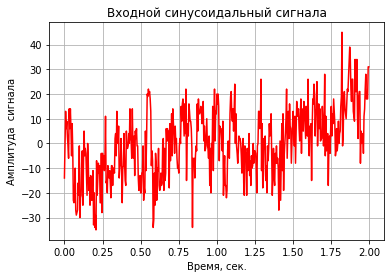

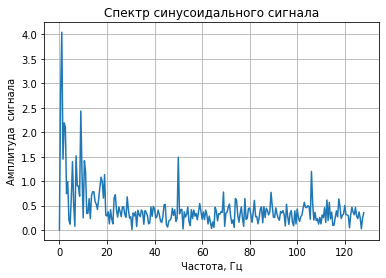

0


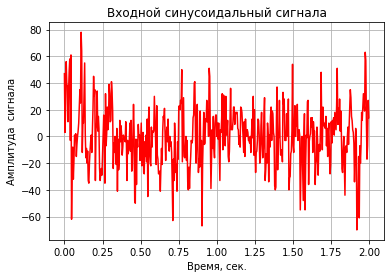

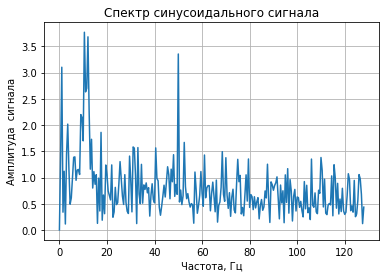

0


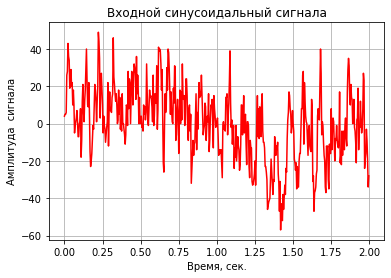

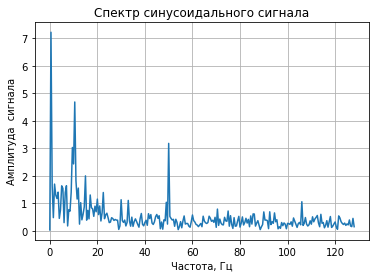

0
----------------------------------


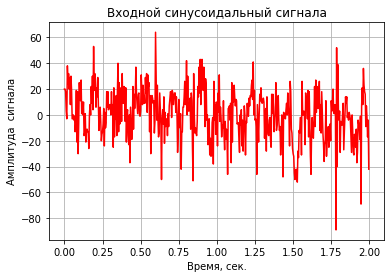

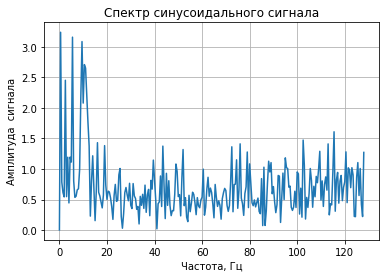

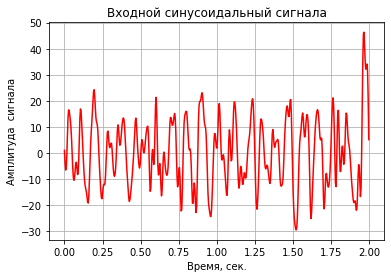

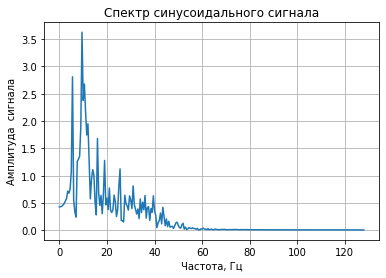

0
----------------------------------


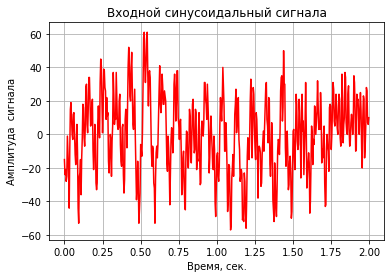

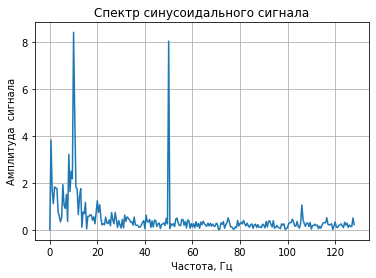

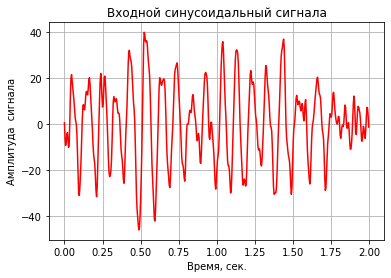

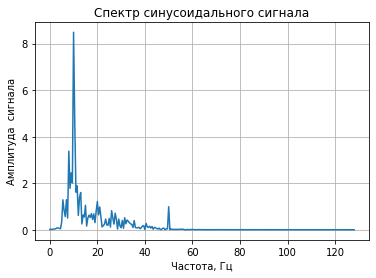

0


In [ ]:
#!/usr/bin/env python
#coding=utf8
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Comic Sans MS, Arial'
FD = 256 #частота дискретизации, отсчётов в секунду
N = 512  #длина входного массива, N/FD секунд 
# F=256.0#циклическая частота входного сигнала
# w=(2.*pi*F/FD) #отсчёт круговой частоты 
# A=3.0#амплитуда сигнала
# B=0.5#порог ограничения
id = 0
id_2 = 5
id_3 = 19
id_4 = 73
id_5 = 55
#сгенерируем чистый синусоидальный сигнал с частотой F длиной N
# sin_sig = array([A*sin(w*t) for t in range(N)])#график сигнала
plt.plot(arange(N)/float(FD), X_train.values[id], 'r')
plt.xlabel('Время, сек.')
plt.ylabel('Амплитуда  сигнала')
plt.title('Входной синусоидальный сигнала')
plt.grid(True)
plt.show()
spectr_sin = rfft(X_train.values[id] )#вычисляем дискретное действительное rfft  преобразование Фурье
plt.plot(rfftfreq(N, 1./FD), np_abs(spectr_sin)/N) #график спектра
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда  сигнала')
plt.title('Спектр синусоидального сигнала')
plt.grid(True)
plt.show()

print(y_train.values[id])

plt.plot(arange(N)/float(FD), X_train.values[id_2], 'r')
plt.xlabel('Время, сек.')
plt.ylabel('Амплитуда  сигнала')
plt.title('Входной синусоидальный сигнала')
plt.grid(True)
plt.show()
spectr_sin = rfft(X_train.values[id_2] )#вычисляем дискретное действительное rfft  преобразование Фурье
plt.plot(rfftfreq(N, 1./FD), np_abs(spectr_sin)/N) #график спектра
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда  сигнала')
plt.title('Спектр синусоидального сигнала')
plt.grid(True)
plt.show()


print(y_train.values[id_2])


plt.plot(arange(N)/float(FD), X_train.values[id_3], 'r')
plt.xlabel('Время, сек.')
plt.ylabel('Амплитуда  сигнала')
plt.title('Входной синусоидальный сигнала')
plt.grid(True)
plt.show()
spectr_sin = rfft(X_train.values[id_3] )#вычисляем дискретное действительное rfft  преобразование Фурье
plt.plot(rfftfreq(N, 1./FD), np_abs(spectr_sin)/N) #график спектра
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда  сигнала')
plt.title('Спектр синусоидального сигнала')
plt.grid(True)
plt.show()


print(y_train.values[id_3])


print('----------------------------------')
plt.plot(arange(N)/float(FD), X_train.values[id_4], 'r')
plt.xlabel('Время, сек.')
plt.ylabel('Амплитуда  сигнала')
plt.title('Входной синусоидальный сигнала')
plt.grid(True)
plt.show()
spectr_sin = rfft(X_train.values[id_4] )#вычисляем дискретное действительное rfft  преобразование Фурье
plt.plot(rfftfreq(N, 1./FD), np_abs(spectr_sin)/N) #график спектра
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда  сигнала')
plt.title('Спектр синусоидального сигнала')
plt.grid(True)
plt.show()



Xs = butter_lowpass_filter(X_train.values[id_4], cutoff,cutoff_2, 256, order)

plt.plot(arange(N)/float(FD), Xs, 'r')
plt.xlabel('Время, сек.')
plt.ylabel('Амплитуда  сигнала')
plt.title('Входной синусоидальный сигнала')
plt.grid(True)
plt.show()
spectr_sin = rfft(Xs)#вычисляем дискретное действительное rfft  преобразование Фурье
plt.plot(rfftfreq(N, 1./FD), np_abs(spectr_sin)/N) #график спектра
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда  сигнала')
plt.title('Спектр синусоидального сигнала')
plt.grid(True)
plt.show()


print(y_train.values[id_4])


print('----------------------------------')
plt.plot(arange(N)/float(FD), X_train.values[id_5], 'r')
plt.xlabel('Время, сек.')
plt.ylabel('Амплитуда  сигнала')
plt.title('Входной синусоидальный сигнала')
plt.grid(True)
plt.show()
spectr_sin = rfft(X_train.values[id_5] )#вычисляем дискретное действительное rfft  преобразование Фурье
plt.plot(rfftfreq(N, 1./FD), np_abs(spectr_sin)/N) #график спектра
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда  сигнала')
plt.title('Спектр синусоидального сигнала')
plt.grid(True)
plt.show()



Xs = butter_lowpass_filter(X_train.values[id_5], cutoff,cutoff_2, 256, order)
plt.plot(arange(N)/float(FD), Xs, 'r')
plt.xlabel('Время, сек.')
plt.ylabel('Амплитуда  сигнала')
plt.title('Входной синусоидальный сигнала')
plt.grid(True)
plt.show()
spectr_sin = rfft(Xs)#вычисляем дискретное действительное rfft  преобразование Фурье
plt.plot(rfftfreq(N, 1./FD), np_abs(spectr_sin)/N) #график спектра
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда  сигнала')
plt.title('Спектр синусоидального сигнала')
plt.grid(True)
plt.show()


print(y_train.values[id_5])

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Подготовка к финалу

In [ ]:
import numpy as np
from scipy.signal import butter,filtfilt

import matplotlib.pyplot as plt

# Filter requirements.
# T = 5.0         # Sample Period
# fs = 30.0       # sample rate, Hz
cutoff = 40      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
cutoff_2 = 5
nyq = 0.5 * 256  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = 512 # total number of samples

# data = sig + noise
def butter_lowpass_filter(data, cutoff,cutoff_2, fs, order):
    normal_cutoff = cutoff / nyq
    normal_cutoff_2 = cutoff_2 / nyq
    # Get the filter coefficients 
    # b, a = butter(order, normal_cutoff, btype='high', analog=False)
    # y = filtfilt(b, a, data)

    b, a = butter(order, [normal_cutoff_2,normal_cutoff],btype='band', analog=False)
    y = filtfilt(b, a, data)
    return y

y = butter_lowpass_filter(X_train.values[86], cutoff,cutoff_2, 256, order)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = X_train.values[86],
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()


In [ ]:

fs = 256


fft_vals = np.absolute(np.fft.rfft(y))  

  # Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(y), 1.0 / fs)     # that might be fixed (window length n , and  sample spacing) inverse of the sampling rate   returns sample freq of length n .

  # Define EEG bands
eeg_bands = {'Delta': (0, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

  # Take the mean of the fft amplitude for each EEG band
l = []
eeg_band_fft = dict()
for band in eeg_bands:
      freq_ix = np.where((fft_freq >= eeg_bands[band][0]) &   #np.where is like asking "tell me where in this array, entries satisfy a given condition".
                        (fft_freq <= eeg_bands[band][1]))[0]    #for fft_frreq at all point where it satisfies it returns the index (in array)
                                                              #if fftfreq[np.where bla bla] will give values array
      eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

eeg_band_fft



{'Alpha': 2141.3840661694944,
 'Beta': 436.0960573886608,
 'Delta': 68.8100175181508,
 'Gamma': 117.54077863069008,
 'Theta': 298.3437541956502}

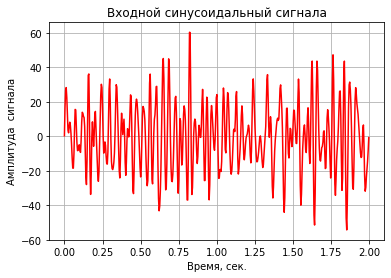

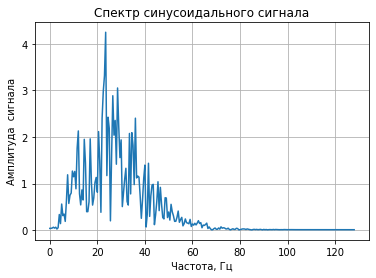

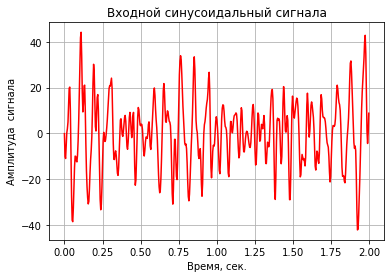

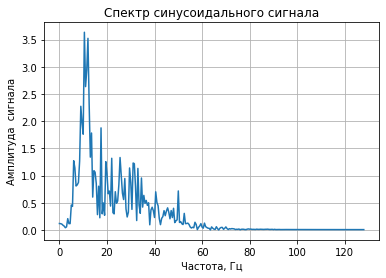

In [ ]:
#!/usr/bin/env python
#coding=utf8
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Comic Sans MS, Arial'
FD = 256
N = 512  
y = butter_lowpass_filter(X_train.values[8], cutoff,cutoff_2, 256, order)

# Без альфа
plt.plot(arange(N)/float(FD), y, 'r')
plt.xlabel('Время, сек.')
plt.ylabel('Амплитуда  сигнала')
plt.title('Входной синусоидальный сигнала')
plt.grid(True)
plt.show()
spectr_sin = rfft(y)#вычисляем дискретное действительное rfft  преобразование Фурье
plt.plot(rfftfreq(N, 1./FD), np_abs(spectr_sin)/N) #график спектра
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда  сигнала')
plt.title('Спектр синусоидального сигнала')
plt.grid(True)
plt.show()

# альфа
y = butter_lowpass_filter(X_train.values[5], cutoff,cutoff_2, 256, order)
plt.plot(arange(N)/float(FD), y, 'r')
plt.xlabel('Время, сек.')
plt.ylabel('Амплитуда  сигнала')
plt.title('Входной синусоидальный сигнала')
plt.grid(True)
plt.show()
spectr_sin = rfft(y)#вычисляем дискретное действительное rfft  преобразование Фурье
plt.plot(rfftfreq(N, 1./FD), np_abs(spectr_sin)/N) #график спектра
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда  сигнала')
plt.title('Спектр синусоидального сигнала')
plt.grid(True)
plt.show()

# SAMPLE RX RX_TEST

In [ ]:
rx = []
rx_test = []

for id in range(len(X_train.values)):
# id = 12
  fs = 256 # Sampling rate (512 Hz) 100


  y = butter_lowpass_filter(X_train.values[id], cutoff,cutoff_2, 256, order)
  # Get real amplitudes of FFT (only in postive frequencies)
  fft_vals = np.absolute(np.fft.rfft(y))    #these are my fft values rfft returns only the part of the result that corresponds to nonpositive frequences. (Avoids complex conjugaes) faster and for plotting

  # Get frequencies for amplitudes in Hz
  fft_freq = np.fft.rfftfreq(len(y), 1.0 / fs)     # that might be fixed (window length n , and  sample spacing) inverse of the sampling rate   returns sample freq of length n .

  # Define EEG bands
  eeg_bands = {'Delta': (0, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

  # Take the mean of the fft amplitude for each EEG band
  l = []
  eeg_band_fft = dict()
  for band in eeg_bands:
      freq_ix = np.where((fft_freq >= eeg_bands[band][0]) &   #np.where is like asking "tell me where in this array, entries satisfy a given condition".
                        (fft_freq <= eeg_bands[band][1]))[0]    #for fft_frreq at all point where it satisfies it returns the index (in array)
                                                              #if fftfreq[np.where bla bla] will give values array
      eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
      l.append(np.mean(fft_vals[freq_ix]))
  rx.append(l)


for id in range(len(X_test.values)):
# id = 12
  fs = 256 # Sampling rate (512 Hz) 100


  y = butter_lowpass_filter(X_test.values[id], cutoff,cutoff_2, 256, order)
  # Get real amplitudes of FFT (only in postive frequencies)
  fft_vals = np.absolute(np.fft.rfft(y))    #these are my fft values rfft returns only the part of the result that corresponds to nonpositive frequences. (Avoids complex conjugaes) faster and for plotting

  # Get frequencies for amplitudes in Hz
  fft_freq = np.fft.rfftfreq(len(y), 1.0 / fs)     # that might be fixed (window length n , and  sample spacing) inverse of the sampling rate   returns sample freq of length n .

  # Define EEG bands
  eeg_bands = {'Delta': (0, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

  # Take the mean of the fft amplitude for each EEG band
  l = []
  eeg_band_fft = dict()
  for band in eeg_bands:
      freq_ix = np.where((fft_freq >= eeg_bands[band][0]) &   #np.where is like asking "tell me where in this array, entries satisfy a given condition".
                        (fft_freq <= eeg_bands[band][1]))[0]    #for fft_frreq at all point where it satisfies it returns the index (in array)
                                                              #if fftfreq[np.where bla bla] will give values array
      eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
      l.append(np.mean(fft_vals[freq_ix]))
  rx_test.append(l)

In [ ]:
eeg_band_fft #filter

{'Alpha': 156.18435489043105,
 'Beta': 44.03527568241075,
 'Delta': 127.91548285196019,
 'Gamma': 0.8563639826031575,
 'Theta': 165.55417024750517}

In [ ]:
eeg_band_fft #normal

{'Alpha': 196.16243809331417,
 'Beta': 147.35953626567454,
 'Delta': 24.77961286472909,
 'Gamma': 38.51101787680728,
 'Theta': 168.93458039977492}

0

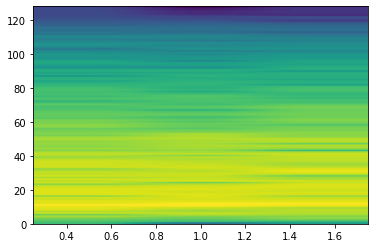

In [ ]:
from matplotlib.pyplot import specgram
id = 5
y = butter_lowpass_filter(X_train.values[id], cutoff,cutoff_2, 256, order) # срезаем верхние и нижние частоты
specgram(y.flatten(), NFFT=256, Fs=256)
y_train.values[id]

1

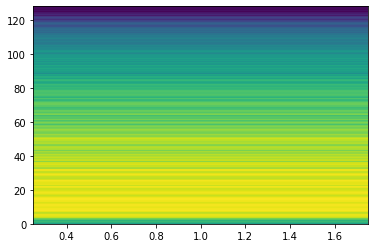

In [ ]:
id = 41
y = butter_lowpass_filter(X_train.values[id], cutoff,cutoff_2, 256, order) # срезаем верхние и нижние частоты
specgram(y, NFFT=512, Fs=256)
y_train.values[id]

In [ ]:
import numpy as np
from scipy.signal import butter,filtfilt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

id = 54
# Filter requirements.
# T = 5.0         # Sample Period
# fs = 30.0       # sample rate, Hz
cutoff = 56  # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
cutoff_2 = 15
nyq = 0.5 * 250  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = len(signal1[id]) # total number of samples

# data = sig + noise
def butter_lowpass_filter(data, cutoff,cutoff_2, fs, order):
    normal_cutoff = cutoff / nyq
    normal_cutoff_2 = cutoff_2 / nyq
    # Get the filter coefficients 
    # b, a = butter(order, normal_cutoff, btype='high', analog=False)
    # y = filtfilt(b, a, data)

    b, a = butter(order, [normal_cutoff_2,normal_cutoff],btype='band', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
from scipy.fftpack import fftfreq, irfft, rfft
# Вырезаем выерхние и нижние частоты, вырезаем частоты в интервале от 46 до 55 (возможно сменить на среднее)
# Используем медианный фильтр
idx=65
start_indx=0
print(len(signal2[idx][start_indx:]))
y = butter_lowpass_filter(signal2[idx][start_indx:], cutoff,cutoff_2, 250, order)

W = rfftfreq(len(y), d = 1/250)


N = len(y)
fs = 250.0
W = fftfreq(N, d=1/fs)
f_signal = rfft(y)
f_signal[((np.abs(W) > 45 * 2 + 3) & (np.abs(W)<=55*2))] = 0 
y = irfft(f_signal)

fig = plt.figure(figsize=(10,5))
# plt.plot(cs)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = signal2[id][start_indx:],
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = scipy.signal.medfilt(y),
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

1375


<Figure size 720x360 with 0 Axes>

In [ ]:
from numpy.fft import rfft,rfftfreq
from numpy import abs as np_abs
import scipy.fftpack as sc 

def fft_preproc(signal1,fs):
    N1= len(signal1)
    spectrum1 = np_abs(rfft(signal1))
    x1 = rfftfreq(N1, 1/fs)
    freq1 = {}
    for i in range(fs):
        freq1[spectrum1[i]] = x1[i]

    return spectrum1,freq1,N1

def fft_features(signal1,fs):
    spectrum1,freq1,N1 = fft_preproc(signal1,fs)
    spec_no_zero = [i for i in spectrum1[1:] if i != 0]
    a1 = 10 * np.log10(spec_no_zero / max(spec_no_zero))

    return np.array([max((spectrum1)/N1),
            min([i for i in np_abs(spectrum1)/N1 if i>0]),
            np.mean(np_abs(spectrum1)/N1),
            np.var(np_abs(spectrum1)/N1),
            np.std(np_abs(spectrum1)/N1),
            freq1[max(i for i in spectrum1[1:] if i > 0 and i in freq1)],
            freq1[min(i for i in spectrum1[1:] if i > 0 and i in freq1)],
            np.mean([freq1[i] for i in spectrum1[1:] if i > 0 and i in freq1]),
            np.median([freq1[i] for i in spectrum1[1:] if i > 0 and i in freq1]),
            np.mean(a1),np.std(a1),np.median(a1)])

def wavelet_features(signal1):
  st='sym5'
  cA1 = pywt.downcoef('a', signal1, 'db20', mode='symmetric', level=5)
  cD1 = pywt.downcoef('d', signal1, 'db20', mode='symmetric', level=5)
  return np.array([np.mean(cA1),np.mean(cD1),
          np.std(cA1),np.std(cD1),
          np.median(cA1),np.median(cD1),
          max(abs(cA1)),max(abs(cD1)),
          min(abs(cA1)),min(abs(cD1))])


def base_features(signal1):
  return np.array([np.mean(signal1),
                   np.std(signal1),
                   np.median(signal1),
                   np.max(signal1),
                   np.min(signal1)])

def freq_biology_features(signal1):
  fs = 256 # Sampling rate (512 Hz) 100 ИЛИ НА 512
  eeg_bands = {'Delta': (0, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

  feat = []
  y = signal1
  fft_vals = np.absolute(np.fft.rfft(y))  
  fft_freq = np.fft.rfftfreq(len(y), 1.0 / fs)
  l = []
  eeg_band_fft = dict()
  for band in eeg_bands:
      freq_ix = np.where((fft_freq >= eeg_bands[band][0]) &   
                        (fft_freq <= eeg_bands[band][1]))[0]    
      eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
      feat.append(eeg_band_fft[band])
  return np.array(feat)

def all_signals(signals):
  signal1 = np.array([0]*512)
  for i in signals.columns:
    signal1 = signal1 + signals[i].values
  signal1 /= 8
  return np.array([np.mean(signal1), np.std(signal1), np.max(signal1),np.min(signal1)])